In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 소성 가공하에서의 incompressibility principle (비압축성의 원리)

'incompressibility' principle (비압축성의 원리) 에 따르면
$A_0l_0=A_fl_f$

여기서 $A_0, A_f$ 는 변형이 발생하기전(혹은 변형 시작점)과 변형이 발생한후 (혹은 변형이 끝점)에서 측정된 시편의 단면적임에 유의하자.

하중이 작용하는 단면적에 수직$^{+}$한 방향으로 작용하는 힘 F는 다음과 같이 표현이 가능하다.

$F=\sigma A=\sigma A_0 l_0 / l=\sigma A_0 / (1+\epsilon_l)$.

- 지난 강의에서 얻어진 진응력-진변형률 곡선 및, 엔지니어링 응력-엔지니어링 변형률을 불러와서 각각 true_data 와 engi_data에 변수에 저장하도록 하겠다.

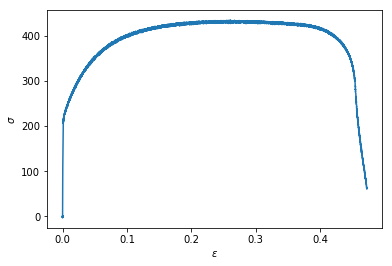

In [2]:
true_data=np.loadtxt('rd4_true.txt').T
# plot(true_data[0],true_data[1])

engi_data=np.loadtxt('rd4_engi.txt').T
plot(engi_data[0],engi_data[1])

xlabel(r'$\epsilon$')
ylabel(r'$\sigma$')

위의 엔지니어링 응력과 변형률 커브가 위로 볼록한 점에 유의하자. 최대 force 는 $dF=0$인 지점에서 찾을 수 있을 것이다.

응력과 힘의 관계에 따라 $F=\sigma A=\sigma A_0 l_0 / l$,

그리고 좌 우변을 각각 미분하면,

$1)\ dF=Ad\sigma+\sigma dA$ 
이 주어진다.
여기서 $dF=0$ 즉 $Ad\sigma+\sigma dA=0$ 조건을 만족하는 지점이 necking이 시작되는 점이다.

또한 부피(즉 volume=Al)에 변화가 없다는 조건은 다음으로 이어진다.

$2)\ Adl + ldA = 0$.

위의 두 조건 1)과 2)를 결합하기 위해

우선 1) 의 좌우변에 $A d\sigma$를 나누어 
$\frac{d\sigma}{\sigma}+\frac{dA}{A}=0$을 얻는다.

다음으로 2) 의 좌우변을 Al로 나누어 
$\frac{dl}{l}+\frac{dA}{A}=0$ 을 얻는다.

위 두 조건을 바탕으로 다음을 얻을 수 있다.

$3)\ -\frac{dA}{A}=\frac{d\sigma}{\sigma}=\frac{dl}{l}$

한편, 앞서 배웠듯 진변형률의 무한소는 $d\epsilon^{true}=\frac{dl}{l}$ 로 나타내어지는 것을 배웠다.

이를 3) 에 대입하면 최대 힘을 가지는 점($dF=0$인 지점, 즉 necking이 발생하는 지점)은 다음과 같은 조건을 만족한다.

$\frac{d\sigma}{\sigma}=d\epsilon^{true}$.

위의 조건은 다음과 같이 또 바뀌어 쓰일 수 있다.

$\frac{d\sigma}{d\epsilon^{true}}=\sigma$

# 실험 데이터로의 적용
- 위에서 우리는 최대의 하중이 작용하는 지점이 $\frac{d\sigma}{d\epsilon^{true}}=\sigma$ 조건을 만족한다는 추론을 '비압축성' 원리를 이용해 알아보았다. 그렇다면 해당 조건이 실제 데이터에 얼마나 작 적용이 되는지 알아보자.

**tip**: np.diff 는 주어진 ndarray(혹은 'list') 타입의 변수에 포함된 element간의 차이값 (interval)을 계산하여 ndarray 타입의 변수로 돌려준다.

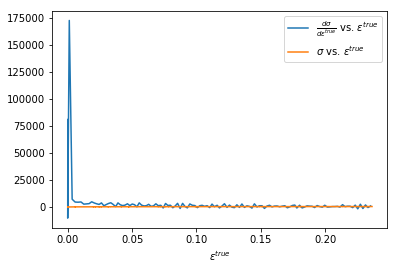

In [3]:
nstp=100 ## element간의 interval을 nstp을 이용해 아래에 대입한다.
dy=np.diff(true_data[1][::nstp])
dx=np.diff(true_data[0][::nstp])

## incremental y 값과 incremental x값의 비율
dydx=dy/dx

plot(true_data[0][::nstp][1:],dydx,label=r'$\frac{d\sigma}{d\epsilon^{true}}$ vs. $\epsilon^{true}$')
plot(true_data[0],true_data[1],label=r'$\sigma$ vs. $\epsilon^{true}$')

xlabel(r"$\epsilon^{true}$")
legend()

- 위의 그래프에 따르면 아직 최대로 힘이 시편에 작용하는 부분(즉 \frac{d\sigma}{d\epsilon^{true}} 값과 \sigma값이 동일한 부분)이 불명확해 보인다. 아래와 같이 그래프의 스케일을 바꾸어 살펴보도록하자.

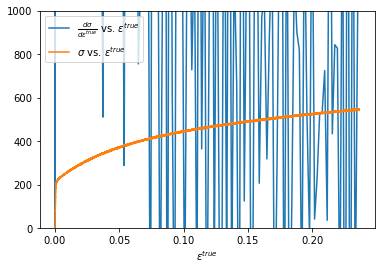

In [4]:
plot(true_data[0][::nstp][1:],dydx,label=r'$\frac{d\sigma}{d\epsilon^{true}}$ vs. $\epsilon^{true}$')
plot(true_data[0],true_data[1],label=r'$\sigma$ vs. $\epsilon^{true}$')
ylim(0,1000)

xlabel(r"$\epsilon^{true}$")
legend()

- 아직도 위의 데이터에 따라서 불명확한점의 이유는 무엇일까? 데이터가 가지는 측정상의 불명확성으로 기인해 발생한 것이라면 interval로 사용했던 숫자를 늘림으로써 해결할 수 있을 것이다. 따라서, nstp 값을 증가시켜 다시 한번 살펴보도록하자.

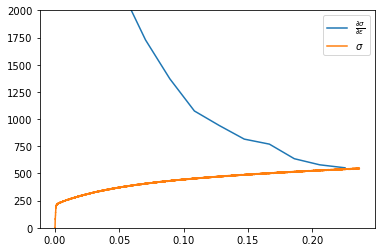

In [5]:
nstp=1000
dy=np.diff(true_data[1][::nstp])
dx=np.diff(true_data[0][::nstp])
dydx=dy/dx

plot(true_data[0][::nstp][1:],dydx,label=r'$\frac{\partial \sigma}{\partial \epsilon}$')
plot(true_data[0],true_data[1],label=r'$\sigma$')
ylim(0,2000)
legend()

## (토의, 질문과 답)

## 응력-변형률 관계를 표현하는 수학적 모델

한 문헌에 따르면 응력/변형률의 관계는 다음과 같은 수식에 의해 잘 표현될 수 있다고 한다.

$\sigma=k\varepsilon^n$

그렇다면, 현재 우리가 사용하고 있는 실험 데이터를 잘 설명할 수 있는 $k$ 와 $n$ 값들을 어떻게 구할 수 있느냐는 의문이 생긴다.
우리는 앞서 '최소자승법'을 이용하여 '선형 관계에 있는' 두 변수 (extensometer의 gauge 값과 voltage 값)를 나타내는 (대표하는) 선형 방정식의 특정할 수 있었다.

이런 방법을 위의 수식(즉 $\sigma=k\varepsilon^n$)의 변수 $k$ 와 $n$ 값을 특정하는데도 적용할 수 있을까? 

주지하듯 위의 방정식은 전혀 '선형'이지 않다.

위의 경우 다음과 같이 로그 함수를 사용하는 방법이 존재한다.

$\ln(\sigma)=\ln(k \varepsilon^n)=\ln k+n\ln\varepsilon$,

위의 방정식이 다음의 선형 방정식과 비슷한 형태를 띄고 있다는 것을 알아보자.

$y=c+bx$,

위에서 $y=\ln\sigma, c=\ln k, b=n$ 그리고 $x=\ln\varepsilon$로 생각할 수 있다.

- 따라서, '최소자승법'을 사용하기 위해서 다음 cell에 제시된 방법으로 해당 데이터를 처리할 수 있다.
- 다만, 적용되는 $\epsilon$값의 범위를 0.001이상으로 제한하여 사용한 점에 유의하자. (잠깐 토의: 그 이유는 무엇일까?)

In [6]:
epsilon=true_data[0] # epsilon
sigma=true_data[1] # sigma

## 변형률 값epsilon가 0.001보다 작거나 같은 부분을 제거하자:
filt=epsilon>0.001
epsilon=epsilon[filt]
# 해당 filt 값을 아래와 같이 대응하는 응력에도 적용을 한다.
sigma=sigma[filt]
# -------

# 차후에 그릴 그래프의 시각화를 돕기위해 각 0, 100, 200 ... 칸에 존재하는 element만 사용하도록 한다.
epsilon=epsilon[::100]
sigma=sigma[::100]

# 그리고 sigma와 epsilon 값을 각각 자연로그 함수에 대입하여, 위의 '선형화'를 완성하자.
y=np.log(sigma)
x=np.log(epsilon)

- 자연 로그 함수를 사용하여 새로 정의한 x와 y값을 그려보자.

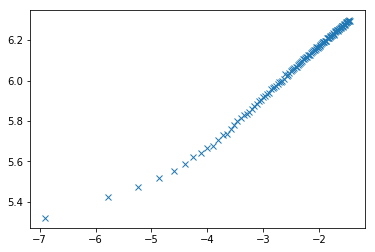

In [7]:
plot(x,y,'x')

(토의) 
1. 얼마나 '선형성'으로 가까워졌는지 살펴보자
2. 어떻게 해야 '선형성'에 가까운 데이터만을 찾을 수 있을까?
3. 비선형성을 가진 위의 데이터 부분은 어떤 물성과 관련이 있을까?
4. 반대로 위의 '비선형성'을 띄는 데이터의 부분은 어떤 물성과 관련이 있을까?

- 지난 강의에서 배운 '최소 자승법'을 이용하도록 하자.

0.223509928087 6.60916334848


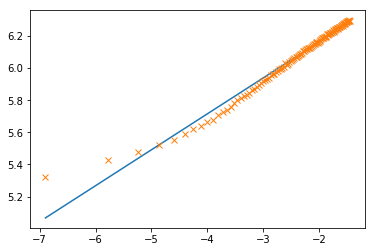

In [8]:
A=np.vstack([x,np.ones(len(x))]).T
b,c=np.linalg.lstsq(A,y)[0]

print b, c
X=np.linspace(min(x),max(x))
Y=b*X+c
plot(X,Y)
plot(x,y,'x')

- 로그 함수의 '역'을 사용하여  m 과 c 를 다시 $k$ 와 $n$ 값으로 변환시키자.

$k=\exp(c)$

$n=b$

최종 $n$ 값과 $k$ 값을 살펴보자

In [9]:
print 'k:',np.exp(c)
print 'n:', b

k: 741.862078959
n: 0.223509928087


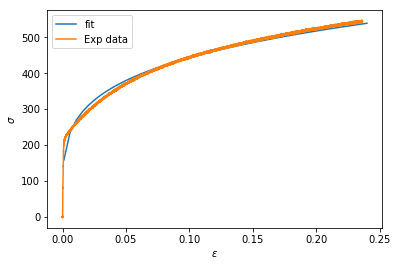

In [10]:
k=np.exp(c)
n=b

x=np.linspace(0.001,0.24)
plot(x,k*(x**n),label='fit')
plot(true_data[0],true_data[1],label='Exp data')
legend()

xlabel(r'$\varepsilon$')
ylabel(r'$\sigma$')

## (토의) 

- 응력과 변형률의 관계를 표현한 위의 $\sigma=k\varepsilon^n$ 식은 Hollomon hardening model (홀로몬 경화 모델)로 불린다.
- 지수 'n' 값은 금속 판재의 '성형성'(주어진 판재가 성형 가공을 얼마나 잘 수용할 수 있는지 나타내는 지표)을 가늠하는 물성치로 쓰이기도 한다. (이에 관해서는 4강에서 더 살펴보도록 하자)